## Анализируем фотоархив с помощью сервиса Imagga.com

Для начала, необходимо зарегистрироваться на сайте [imagga.com](https://imagga.com/), и [в профиле](https://imagga.com/profile/dashboard) скопировать код из раздела **Autorization**. 

In [2]:
api_basic_auth_code = "==AUTH CODE HERE=="

Далее импортируем необходимые модули и опишем функцию для вызова API применительно к конкретному изображению. Все вызовы сервиса удобно описаны [в документации](https://docs.imagga.com/).

In [3]:
import requests
import base64
import sys

image_name = "city.JPG"

def post(url,data):
    h = { "Authorization" : f"Basic {api_basic_auth_code}"}
    return requests.post(url, data = data, headers=h)

def recognize(fname):
    b = base64.b64encode(open(fname,'rb').read())
    d = { "image_base64" : b  }
    url = "http://api.imagga.com/v2/tags"
    return post(url,d).json()

recognize(image_name)

{'result': {'tags': [{'confidence': 75.7730102539062, 'tag': {'en': 'patio'}},
   {'confidence': 62.4312019348145, 'tag': {'en': 'area'}},
   {'confidence': 54.9941902160645, 'tag': {'en': 'city'}},
   {'confidence': 50.6989212036133, 'tag': {'en': 'structure'}},
   {'confidence': 43.6873741149902, 'tag': {'en': 'town'}},
   {'confidence': 38.3836631774902, 'tag': {'en': 'architecture'}},
   {'confidence': 32.9682273864746, 'tag': {'en': 'building'}},
   {'confidence': 30.3422260284424, 'tag': {'en': 'travel'}},
   {'confidence': 27.7884368896484, 'tag': {'en': 'house'}},
   {'confidence': 27.6989192962646, 'tag': {'en': 'panorama'}},
   {'confidence': 27.4503479003906, 'tag': {'en': 'resort'}},
   {'confidence': 26.5017623901367, 'tag': {'en': 'sky'}},
   {'confidence': 26.4601459503174, 'tag': {'en': 'tourism'}},
   {'confidence': 25.3453426361084, 'tag': {'en': 'landscape'}},
   {'confidence': 23.7070636749268, 'tag': {'en': 'cityscape'}},
   {'confidence': 23.3992538452148, 'tag': 

Imagga также позволяет делать категоризацию с помощью нескольких предобученных моделей. Список всех моделей можно получить следующим образом:

In [4]:
def get(url):
    h = { "Authorization" : f"Basic {api_basic_auth_code}"}
    return requests.get(url, headers=h)

def get_categorizers():
    return get("http://api.imagga.com/v2/categorizers").json()['result']['categorizers']

cats = get_categorizers()
[ (x['id'], x['title']) for x in cats ]

[('general_v3', 'general_v3'),
 ('nsfw_beta', 'NSFW Categorizer (beta v2)'),
 ('personal_photos', 'Personal Photos Categorizer'),
 ('realestate_dwellings', 'Real Estate - Dwellings Categorizer'),
 ('realestate_rooms', 'Real Estate - Rooms Categorizer')]

Теперь, зная название классификатора, мы можем вызвать соответствующий сервис:

In [5]:
def categorize(fname,categorizer='general_v3'):
    b = base64.b64encode(open(fname,'rb').read())
    url = f"http://api.imagga.com/v2/categories/{categorizer}"

    d = { "image_base64" : b  }
    res = post(url, data = d)
    #print(res)
    return res.json()['result']['categories']

categorize(image_name)

[{'confidence': 38.0303611755371, 'name': {'en': 'patio.n.01'}},
 {'confidence': 8.07145023345947, 'name': {'en': 'resort.n.01'}},
 {'confidence': 6.04053449630737, 'name': {'en': 'resort_hotel.n.02'}},
 {'confidence': 4.70776128768921, 'name': {'en': 'cemetery.n.01'}},
 {'confidence': 4.31196308135986, 'name': {'en': 'waterfront.n.01'}},
 {'confidence': 3.51166129112244, 'name': {'en': 'business_district.n.01'}},
 {'confidence': 2.64490294456482, 'name': {'en': 'balcony.n.02'}},
 {'confidence': 1.93173515796661, 'name': {'en': 'fortress.n.01'}},
 {'confidence': 1.85052943229675, 'name': {'en': 'wall.n.07'}},
 {'confidence': 1.68889200687408, 'name': {'en': 'seaside.n.01'}},
 {'confidence': 1.50998091697693, 'name': {'en': 'shoreline.n.01'}}]

In [6]:
categorize(image_name,
            categorizer='personal_photos')

[{'confidence': 88.0870590209961, 'name': {'en': 'beaches seaside'}},
 {'confidence': 11.763053894043, 'name': {'en': 'streetview architecture'}}]

## Группируем лица на фотографиях

Посмотрим на возможности сервиса по работе с лицами. Для поиска всех лиц на фото используется вызов `faces/detections`. Если указать соответствующий флаг `return_face_id`, то для каждого найденного лица будет возвращен уникальный идентификатор, по которому потом можно будет ссылаться на это лицо для дополнительных функций.

In [6]:
def find_faces(fname,return_face_id=True):
    b = base64.b64encode(open(fname,'rb').read())
    d = { "image_base64" : b  }
    if return_face_id:
        d['return_face_id'] = 1
    url = "http://api.imagga.com/v2/faces/detections"
    return post(url,d).json()

res = find_faces("d:/Data/photos/2022-07-31 12-42-57.jpg")
res

{'result': {'faces': [{'attributes': [],
    'confidence': 99.9999618530273,
    'coordinates': {'height': 227,
     'width': 227,
     'xmax': 989,
     'xmin': 762,
     'ymax': 665,
     'ymin': 438},
    'face_id': 'a951d173cf3025b73da963c1641cbebf60ea72177d0ef20161db912b2e0656de',
    'landmarks': []},
   {'attributes': [],
    'confidence': 99.9835052490234,
    'coordinates': {'height': 278,
     'width': 278,
     'xmax': 587,
     'xmin': 309,
     'ymax': 530,
     'ymin': 252},
    'face_id': 'fbdfcd0406c7ba33c190d24255a88ea4b75ca9e9cd8068c393d159f41dd2e5ca',
    'landmarks': []}]},
 'status': {'text': '', 'type': 'success'}}

Посмотрим, насколько точно было найдено лицо на фото. Загрузим исходную фотографию:

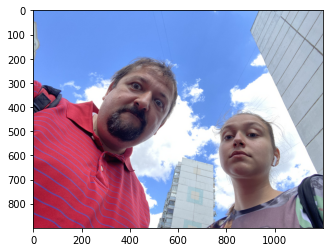

In [7]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

im = np.array(Image.open("d:/Data/photos/2022-07-31 12-42-57.jpg"))
plt.imshow(im)

Теперь с помощью срезов вырежем фрагмент фотографии по координатам лица:

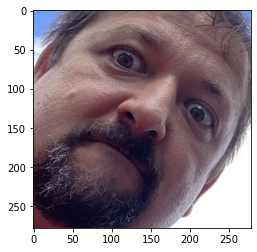

In [9]:
j = res['result']['faces'][1]['coordinates']
plt.imshow(im[j['ymin']:j['ymax'],j['xmin']:j['xmax']])

Для примера обработаем небольшой фрагмент семейного фотоальбома. Для каждой фотографии будем брать лицо и извлекать его, запоминая `face id` и вырезанный фрагмент фотографии:

In [10]:
d = 'd:/Data/photos/'
faces = {} 
for fn in os.listdir(d):
    f = os.path.join(d,fn)
    res = find_faces(f)
    im = np.array(Image.open(f))
    print(f"{fn} -> {len(res['result']['faces'])}")
    for f in res['result']['faces']:
        j = f['coordinates']
        faces[f['face_id']] = im[j['ymin']:j['ymax'],j['xmin']:j['xmax']]
print(f"Found {len(faces)} faces")

2022-07-31 12-42-57.jpg -> 2
2022-07-31 17-12-51.jpg -> 4
2022-08-22 18-30-03.jpg -> 1
2022-10-23 16-32-28.jpg -> 1
2022-10-29 14-32-16.jpg -> 1
2022-10-29 16-43-45.jpg -> 2
2022-10-30 15-37-04.jpg -> 2
2022-11-05 00-03-25_1667674252554.JPG -> 3
Found 16 faces


Также опишем удобную функцию для отображения списка фотографий:

In [11]:
def display_images(l):
    n=len(l)
    fig,ax = plt.subplots(1,n)
    for i,im in enumerate(l):
        ax[i].imshow(im)
        ax[i].axis('off')
    fig.set_size_inches(fig.get_size_inches()*n)
    plt.tight_layout()
    plt.show()

Посмотрим на все найденные лица:

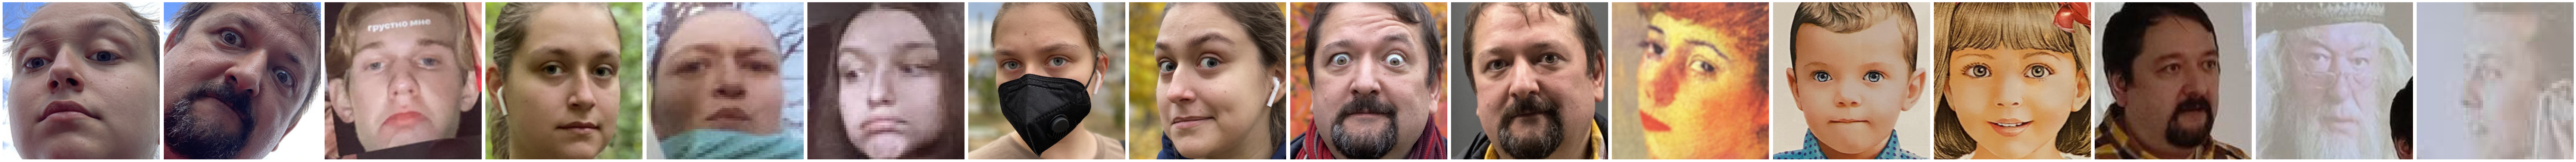

In [12]:
display_images(faces.values())

Imagaa поддерживает также фукнцию группировки похожих лиц. Ей необходимо передать список полученных ранее `face id`:

In [13]:
def group(face_id_list):
    d = { "faces": face_id_list }
    h = { "Authorization" : f"Basic {api_basic_auth_code}"}
    res = requests.post("https://api.imagga.com/v2/faces/groupings", json = d, headers=h)
    return res.json()

res = group(list(faces.keys()))
res

{'result': {'ticket_id': '2defd1b327831369b3216fdc7d25d4e24043cfcb457f2f2e23f2ffe3486bf2d89d8bd045c262cd9a487f297c1d4a754f47ec'},
 'status': {'text': '', 'type': 'success'}}

Эта функция может работать достаточно долго, поэтому она не сразу возвращает результат, а только `ticket_id`, по которому можно проверять готовность результата. Опишем функцию для получения и проверки готовности:

In [14]:
def check(ticket_id):
    return get(f"https://api.imagga.com/v2/tickets/{ticket_id}").json()

r = check(res['result']['ticket_id'])
r

{'result': {'is_final': True,
  'ticket_result': {'groups': [['6dfaff10114d119662db60befd07621ce7ef508265fa072b778e36308101fe24',
     '450eee17bad8519c85687f4b99cc9d38c1a05c2af64ed4274fd8835b2f987601',
     '1f9747d8a20d6ab6cc577074f6f5a71f471f9f617457f6616061267414d796a7',
     '76f6df29f2d4790c05140986b3d5eba13a1600301d28d6b414e52a61e7c3bf0f'],
    ['d073095e9f90f78593f6d709b57bd49c604ebb7596a40e74789a24287dd3c36f',
     '128dfe78c80c13b3c41d650dec17829e9eb109834f87937bfe98ea3ac0303354',
     '017c3467f1cf9a8b7461685f0057a56cf7a0ccc7f1c55a95b2a1c11041728c71',
     '4b282f73fc326b2b5200376510598a156835e351cbf90b2f9e28dbd988494e05'],
    ['af4f4cf47ae9eb667f9a745e159651eda98b575f81b6628bc556437b572a3da0'],
    ['8cfab695e37afcf6d40d6b26cfb1d187060a8e9dbbacde60a42ce2e6c5f496d3'],
    ['e2335d0985970ca9a71baa16e45ea891e179bdcee8b811f8f90d7cae5a6641b4'],
    ['58a3e53832d371e1fe25908f05d8b16121880dfedd00624e8dd1bc15657bf170'],
    ['9aea64e8234972c2a276890fb693a150708ed39e857d3bfb4cb2f10

Теперь посмотрим на то, какие группы лиц у нас получились:

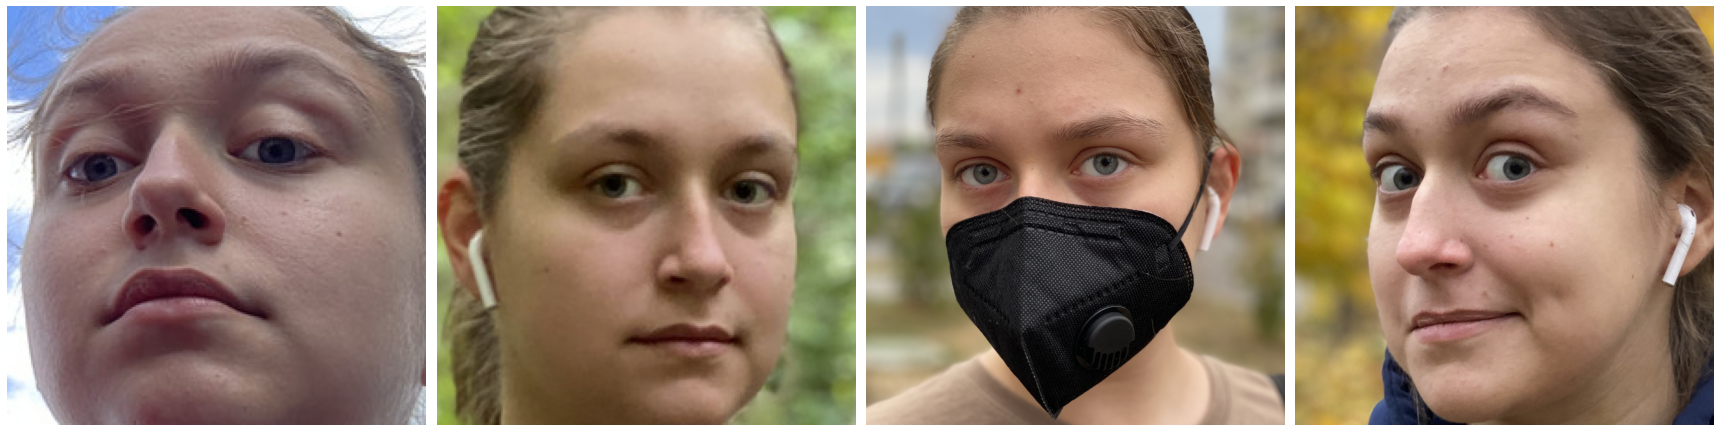

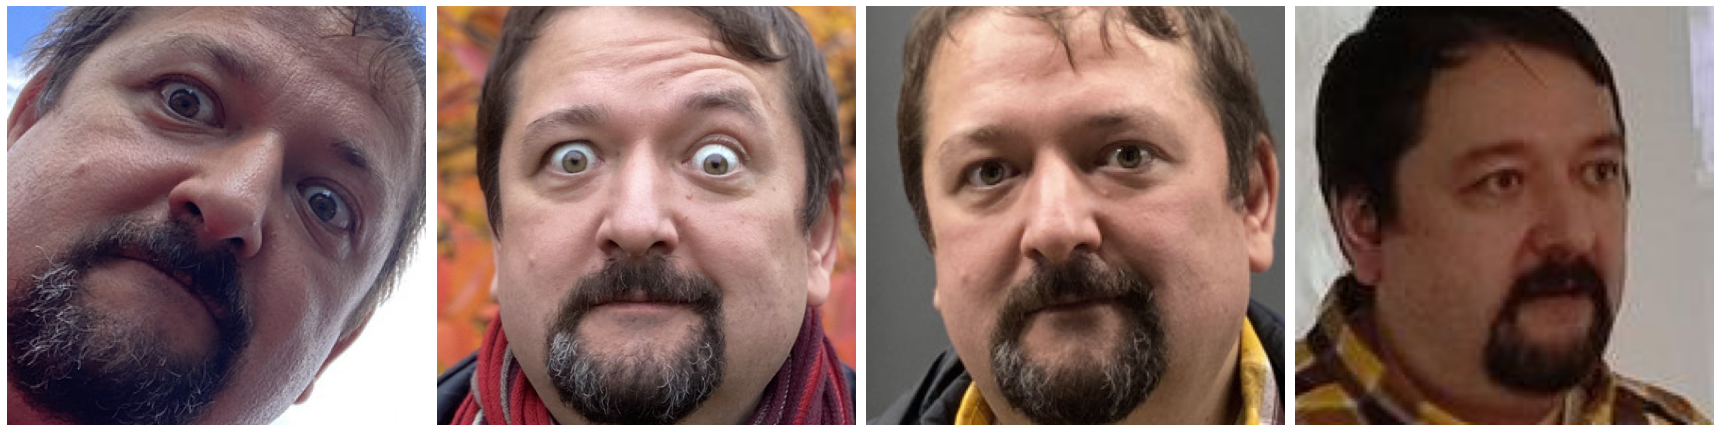

In [15]:
for g in r['result']['ticket_result']['groups']:
    if len(g)>1:
        display_images([ faces[id] for id in g])